# Pitch Tipping Via Human Pose Estimation and Time Series Classification by Justin Feldman 

## Initial Dataset Setup:
### This file is designed to help you figure out the video cropping parameters to best run MediaPipe pose estimations. By cropping the video consistently, background distractions are removed and the dataset is much cleaner. Otherwise, many of the samples are untenable. 

### Instructions:
####    1. From your stockpile of videos, add the path of a video that you believe is representative of a good video sample. 
- If using a broadcast video similar to which this project was designed around, oftentimes the broadcast footage will start elsewhere such as the dugout, or a fan, or  a scoreboard. Use one that focuses on the pitcher throughout his windup and pitching delivery. 

- Using videos from a consistent angle is highly recommended for sound results. The broadcast videos were controlled to one stadium for consistency.  
####    2. Play around with the hyperparameters until you get a result similar to what you see below.
####    3. Use these parameters to fill in the user variables in the main script.

In [1]:
video_path = '/Users/justinfeldman/Desktop/Cortes_Nestor/Fastball/game745701_9bdb16c9-e7f8-45c7-b27a-504d392cb59a.mp4' # Insert your video path here

In [2]:
# Do not touch this cell
import cv2
import matplotlib.pyplot as plt

def video_sample_cropping_calibration(video_path, x_percent, y_percent, width_percent, height_percent):
    """
    Reads the first frame of a video, applies percentage-based cropping, and displays both original and cropped frames.
    
    Args:
        video_path (str): Path to the video file
        x_percent (float), y_percent (float): Starting position of crop as percentage of frame dimensions
        width_percent (float), height_percent (float): Width and height of crop as percentage of frame dimensions
    """
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return
    
    # Read the first frame
    success, frame = cap.read()
    if not success:
        print("Failed to read the first frame")
        return
    
    # Get frame dimensions
    frame_height, frame_width = frame.shape[:2]
    print(f"Original frame dimensions: {frame_width}x{frame_height}")
    
    # Calculate crop parameters based on percentages
    crop_x = int(frame_width * x_percent)
    crop_y = int(frame_height * y_percent)
    crop_width = int(frame_width * width_percent)
    crop_height = int(frame_height * height_percent)
    
    print(f"Crop parameters: x={crop_x}, y={crop_y}, width={crop_width}, height={crop_height}")
    
    # Apply the crop
    cropped_frame = frame[crop_y:crop_y+crop_height, crop_x:crop_x+crop_width]
    
    # Convert from BGR to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cropped_frame_rgb = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB)
    
    # Draw crop rectangle on original frame
    frame_with_rect = frame_rgb.copy()
    cv2.rectangle(frame_with_rect, (crop_x, crop_y), (crop_x + crop_width, crop_y + crop_height), (0, 255, 0), 2)
    
    plt.figure(figsize=(15, 10))
    
    # Original frame with crop rectangle
    plt.subplot(1, 2, 1)
    plt.title('Original Frame with Crop Rectangle')
    plt.imshow(frame_with_rect)
    plt.axis('on')
    
    # Cropped frame
    plt.subplot(1, 2, 2)
    plt.title('Cropped Frame')
    plt.imshow(cropped_frame_rgb)
    plt.axis('on')
    
    plt.tight_layout()
    plt.show()
    
    cap.release()

### Example
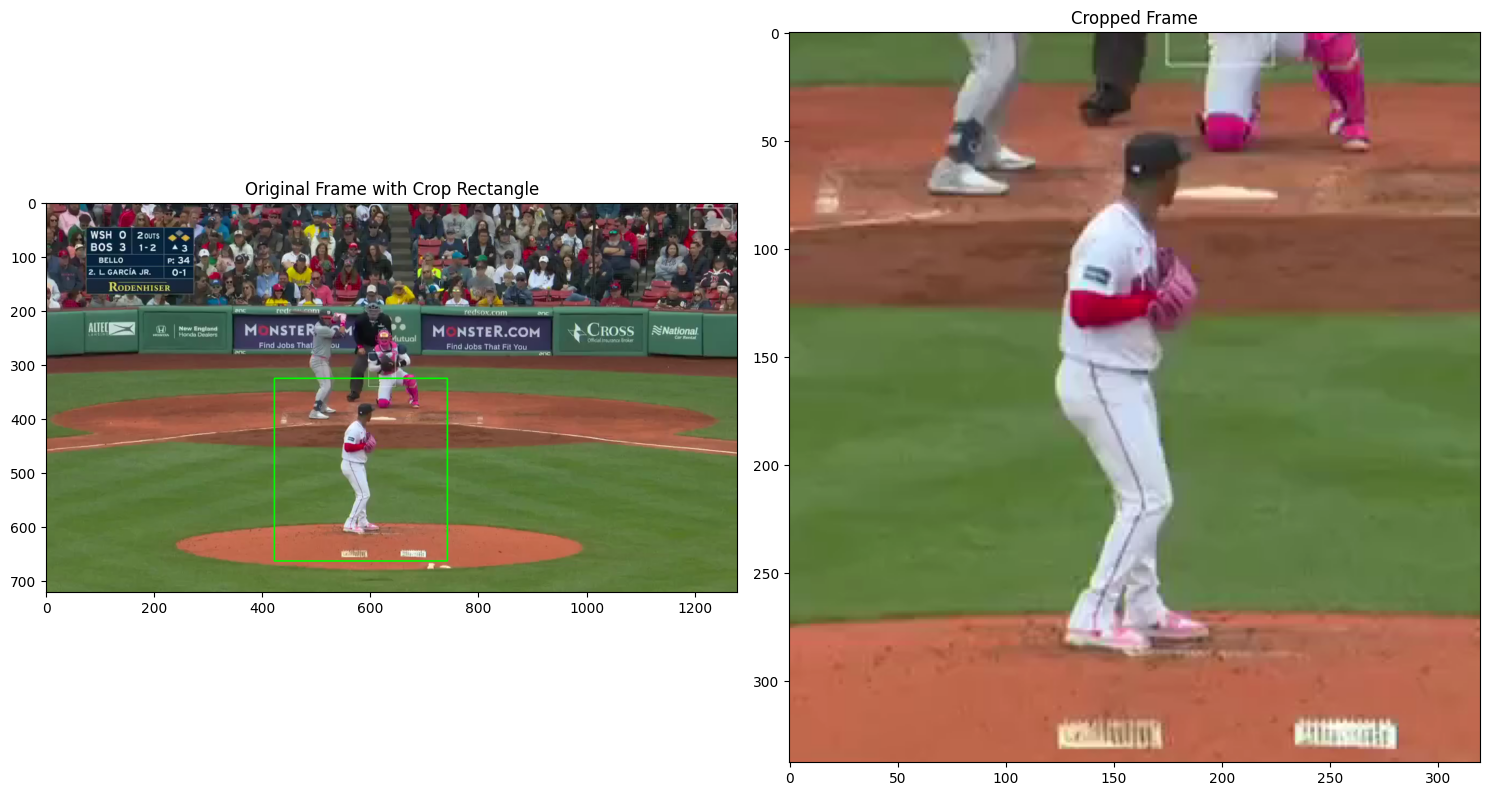

Original frame dimensions: 1280x720
Crop parameters: x=345, y=288, width=320, height=338


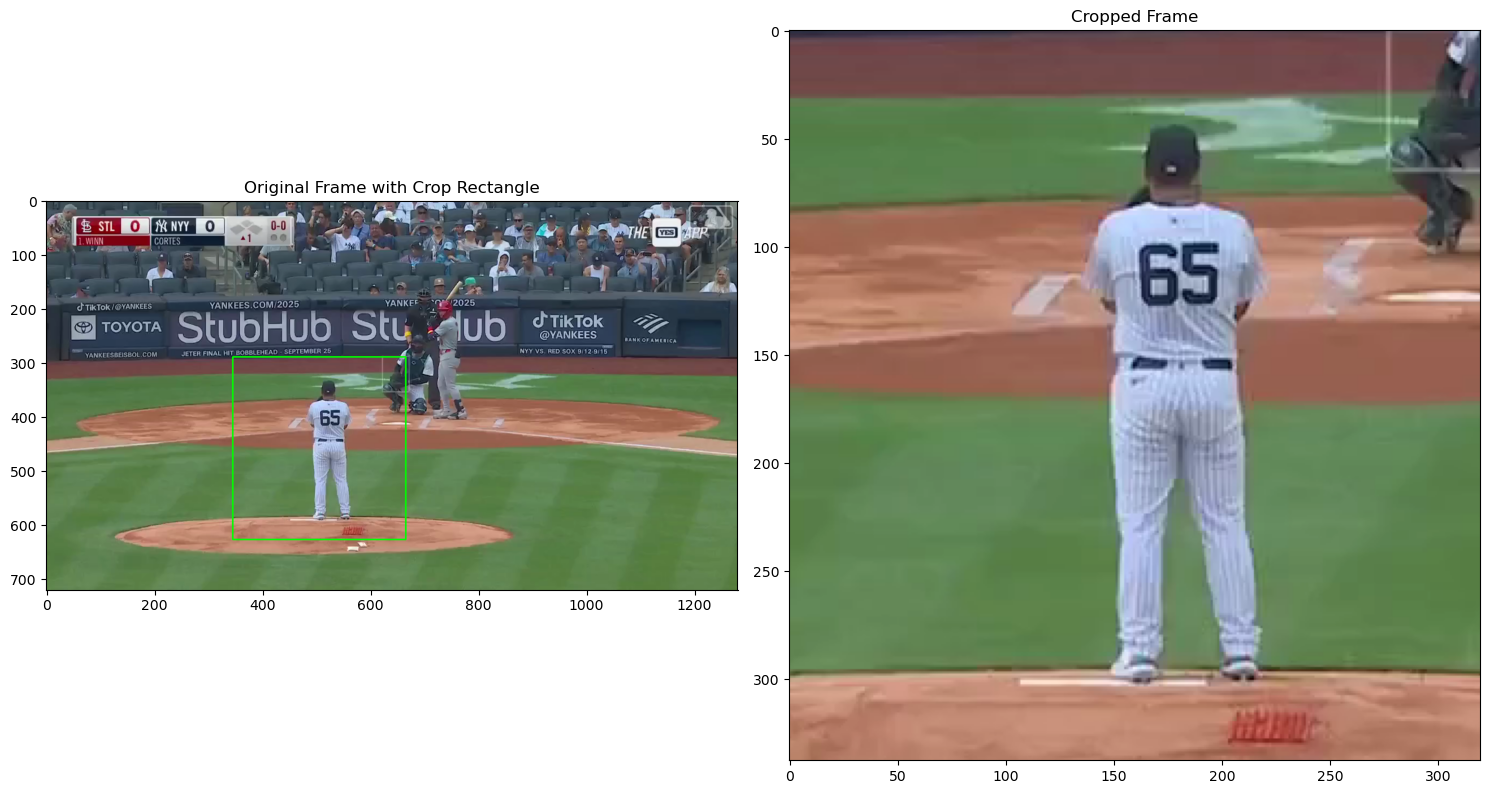

In [5]:
# Change these values to best fit your video.
x_percent = 0.27         # Distance of the left rectangle edge from the left side of the image 
y_percent = 0.4        # Distance of the top rectangle edge from the top of the image
width_percent = 0.25    # Width of the rectangle relative to total width of the image
height_percent = 0.47   # Height of the rectangle relative to the total height of the image

video_sample_cropping_calibration(video_path, x_percent, y_percent, width_percent, height_percent)